<a href="https://colab.research.google.com/github/georges-17/Sales-Forecasting-/blob/main/Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import itertools

In [ ]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=6a418e2300a143230e57149dd3665f610758be1b587898aba7f329aa2f0f456c
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [ ]:
import pandasql as ps

In [ ]:
from dateutil import parser
from datetime import datetime,timedelta, date

In [ ]:
import holidays
from prophet import Prophet
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import cross_validation

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Handy functions

In [ ]:
def missing_data(input_data):
    '''This function returns dataframe with information about the percentage of nulls in each column and the column data type.
    input: pandas df
    output: pandas df
    '''
    total = input_data.isnull().sum()
    percent = (input_data.isnull().sum()/input_data.isnull().count()*100)
    table = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
    types = []
    for col in input_data.columns:
        dtype = str(input_data[col].dtype)
        types.append(dtype)
    table["Types"] = types

In [ ]:
def mape(actual, pred):
    '''
    Mean Absolute Percentage Error (MAPE) Function

    input: list/series for actual values and predicted values
    output: mape value
    '''
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

# Loading Data




In [ ]:
df =pd.read_csv('train.csv')
df_columns = df.columns.str.replace(' ', '_').str.lower()

df['date'] = pd.to_datetime(df['date'], format= "%Y/%m/%d")



In [ ]:
df.tail()

,id,date,store_nbr,family,sales,onpromotion
743918,743918,2014-02-23,31.00,SEAFOOD,2.00,0.00
743919,743919,2014-02-23,32.00,AUTOMOTIVE,3.00,0.00
743920,743920,2014-02-23,32.00,BABY CARE,0.00,0.00
743921,743921,2014-02-23,32.00,BEAUTY,0.00,0.00
743922,743922,NaT,NaN,NaN,NaN,NaN


In [ ]:
min(df['date']), max(df['date'])

(Timestamp('2013-01-01 00:00:00'), Timestamp('2014-02-23 00:00:00'))

In [ ]:
df.shape

(743923, 6)

In [ ]:
agg = df.groupby(['date','family']).agg({'sales':'sum'}).reset_index().sort_values(['family','date'])

In [ ]:
agg.head()

,date,family,sales
0,2013-01-01,AUTOMOTIVE,0.00
33,2013-01-02,AUTOMOTIVE,255.00
66,2013-01-03,AUTOMOTIVE,161.00
99,2013-01-04,AUTOMOTIVE,169.00
132,2013-01-05,AUTOMOTIVE,342.00


from matplotlib import pyplot as plt
_df_0['sales'].plot(kind='hist', bins=20, title='sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['sales'].plot(kind='line', figsize=(8, 4), title='sales')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
total_sales_df = agg_df.pivot(index='date',columns='family', values='sales')
total_sales_df.head()

family,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,CLEANING,DAIRY,DELI,EGGS,FROZEN FOODS,GROCERY I,GROCERY II,HARDWARE,HOME AND KITCHEN I,HOME AND KITCHEN II,HOME APPLIANCES,HOME CARE,LADIESWEAR,LAWN AND GARDEN,LINGERIE,"LIQUOR,WINE,BEER",MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.00,0.00,2.00,810.00,0.00,180.59,0.00,186.00,143.00,71.09,46.00,29.65,700.00,15.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,5.00,105.00,0.00,110.80,25.00,0.00,0.00,42.64,37.85,0.00,0.00,0.00
2013-01-02,255.00,0.00,207.00,72092.00,0.00,26246.32,0.00,74629.00,23381.00,15754.50,10932.00,7115.39,202020.00,1476.00,46.00,0.00,0.00,21.00,0.00,0.00,121.00,469.00,2411.00,0.00,20871.46,17204.00,0.00,0.00,13975.88,5338.11,0.00,0.00,1526.75
2013-01-03,161.00,0.00,125.00,52105.00,0.00,18456.48,0.00,55893.00,18001.00,11172.45,7358.00,4760.81,144878.00,1048.00,37.00,0.00,0.00,15.00,0.00,0.00,83.00,366.00,2476.00,0.00,16597.40,12568.00,0.00,0.00,10674.39,3591.39,0.00,0.00,1094.31
2013-01-04,169.00,0.00,133.00,54167.00,0.00,16721.97,0.00,52064.00,18148.00,10143.21,6760.00,4525.93,135754.00,1031.00,57.00,0.00,0.00,13.00,0.00,0.00,127.00,382.00,4796.00,0.00,21625.96,11303.00,0.00,0.00,10772.52,4472.97,0.00,0.00,1293.12
2013-01-05,342.00,0.00,191.00,77818.00,0.00,22367.76,0.00,70128.00,23082.00,13734.95,8576.00,5781.61,188356.00,1273.00,87.00,0.00,0.00,11.00,0.00,0.00,180.00,458.00,6715.00,0.00,20879.09,16819.00,0.00,0.00,13475.01,5830.07,0.00,0.00,1245.64


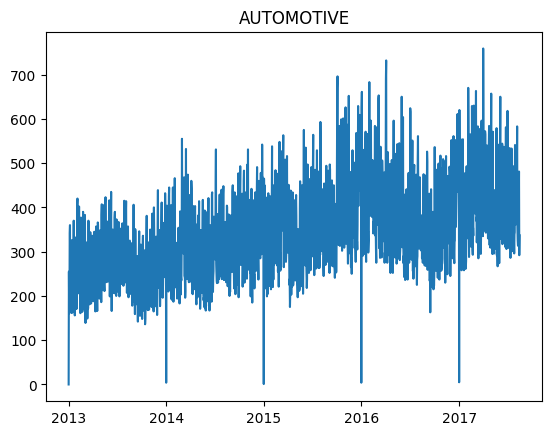

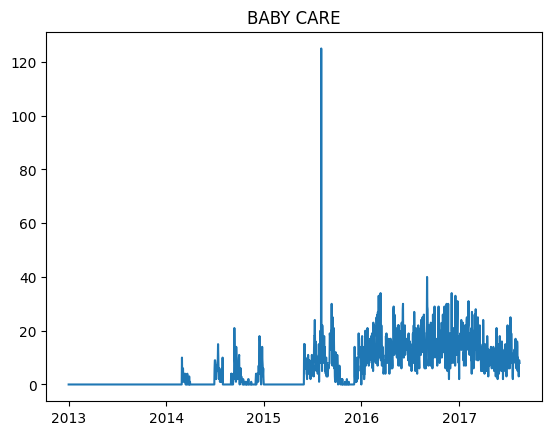

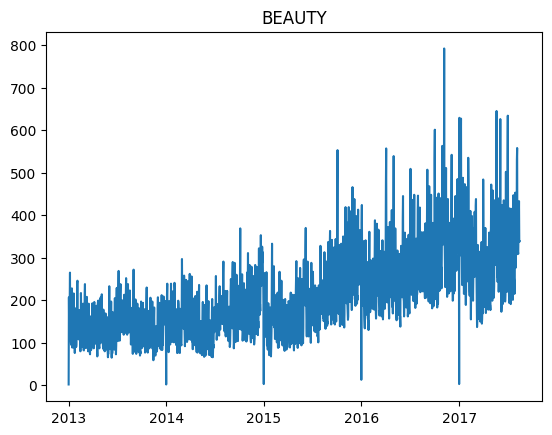

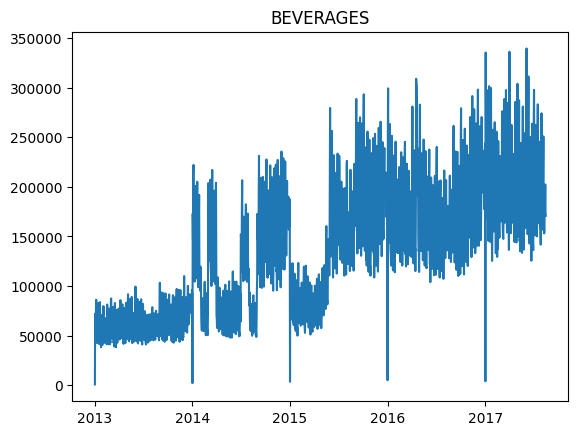

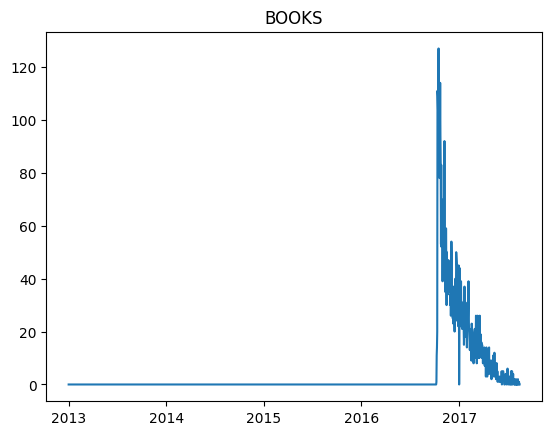

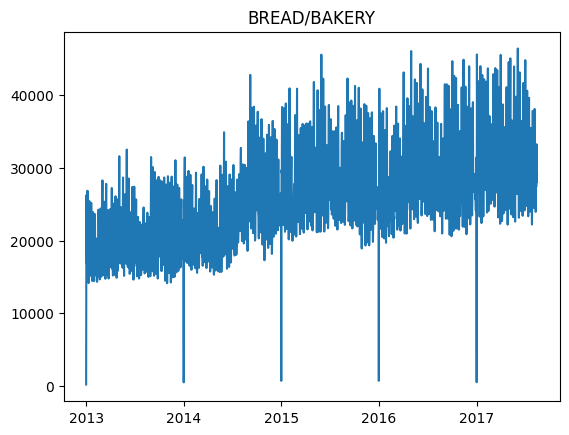

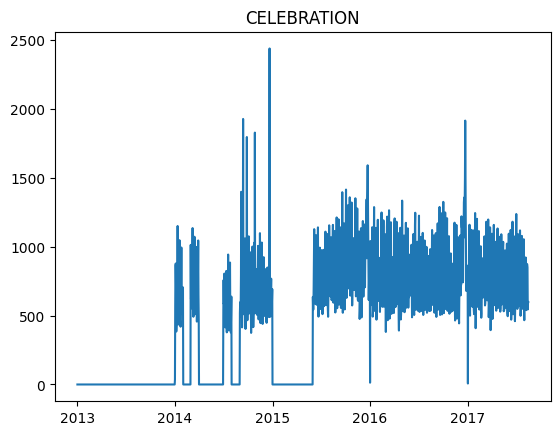

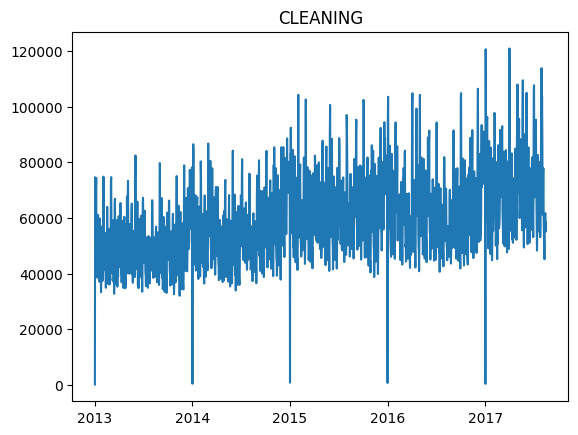

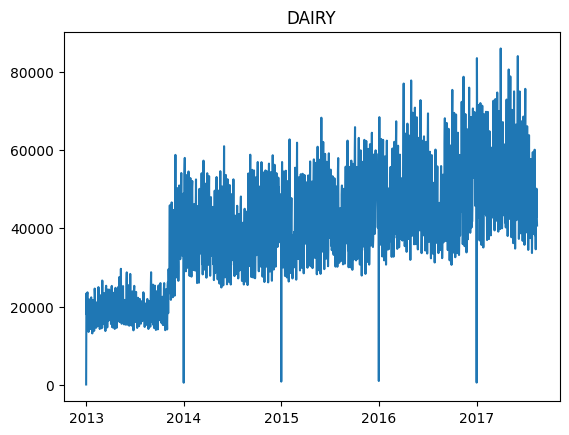

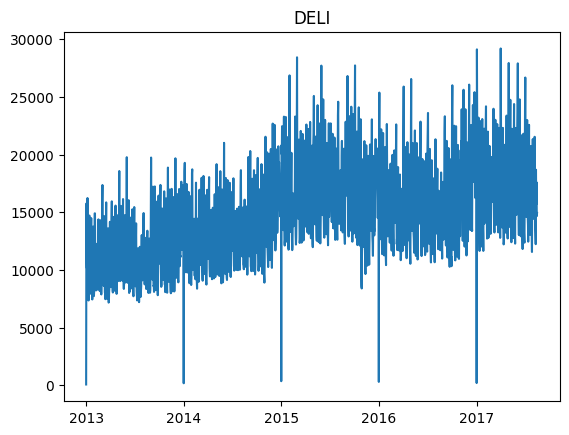

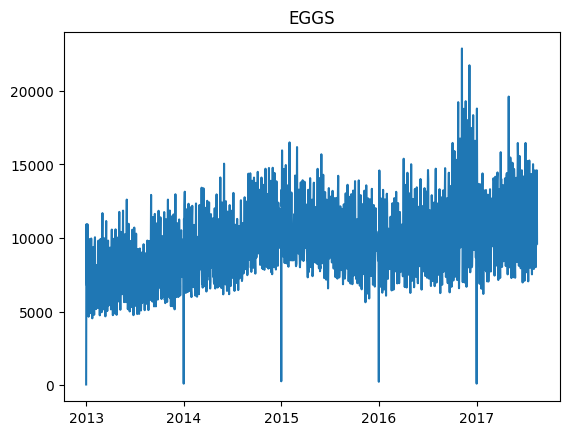

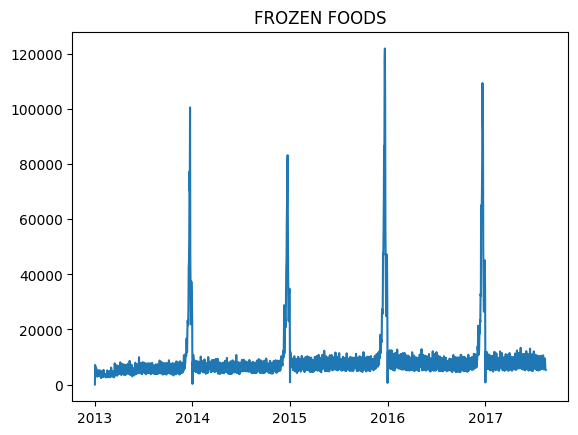

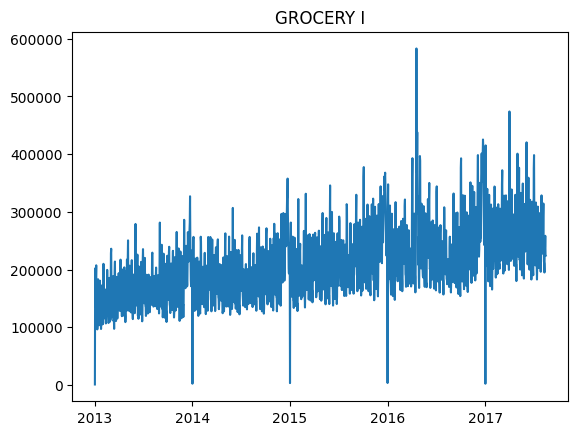

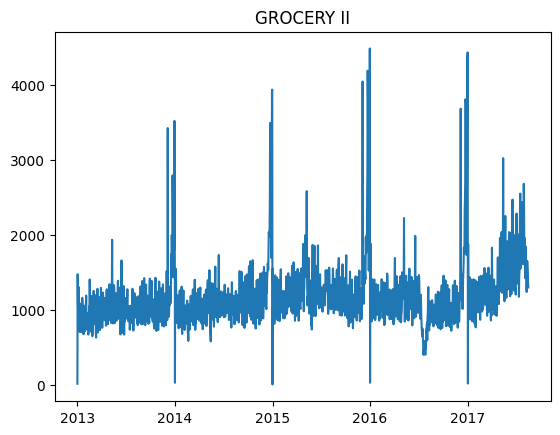

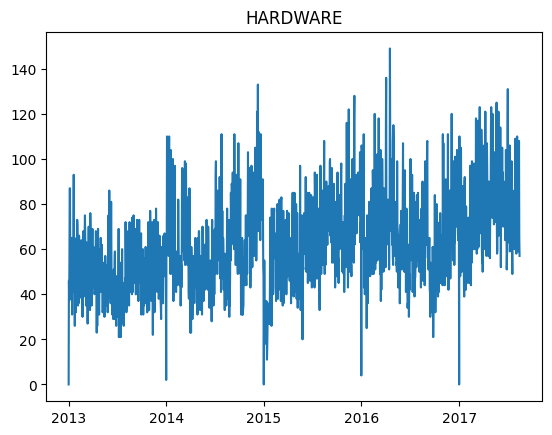

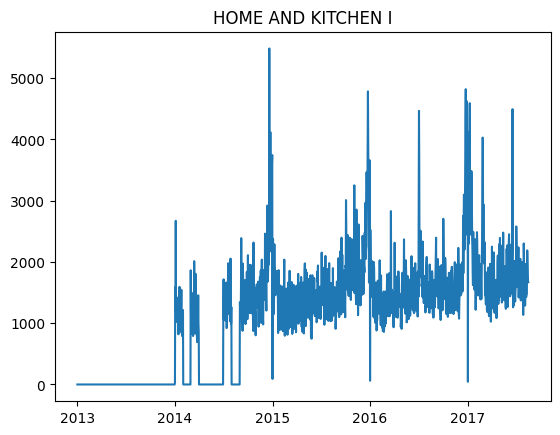

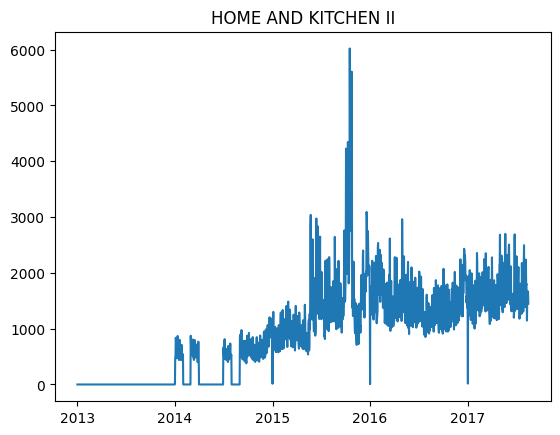

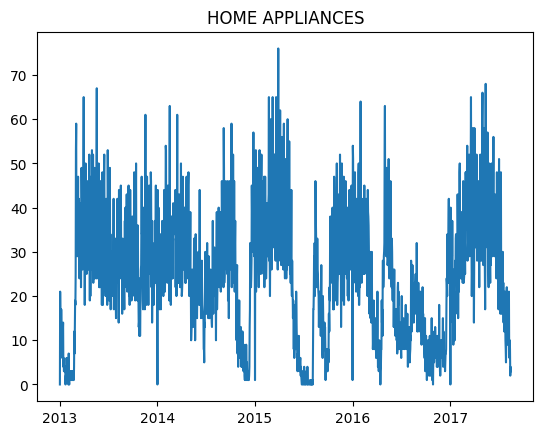

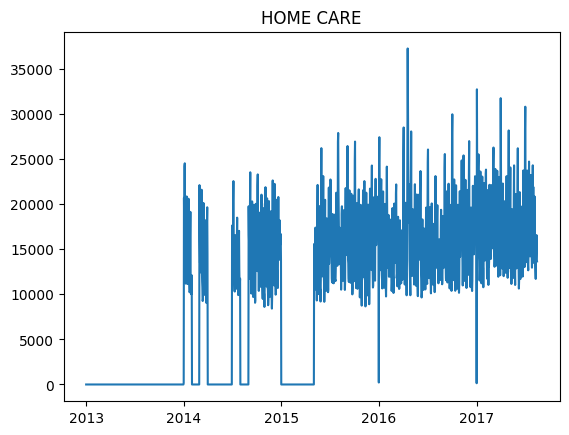

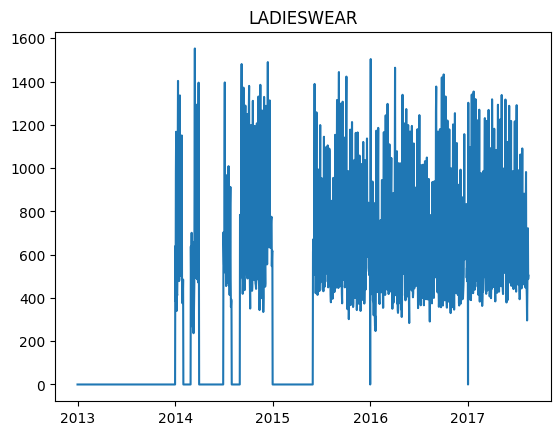

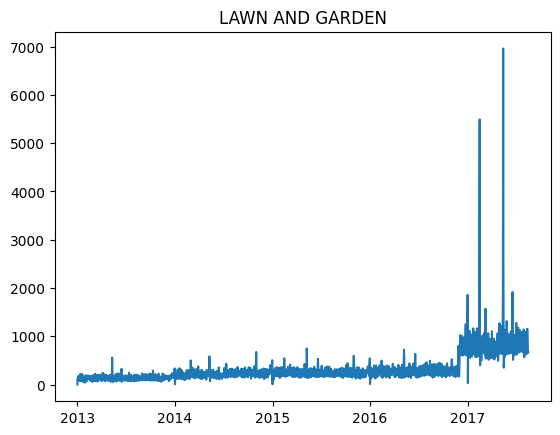

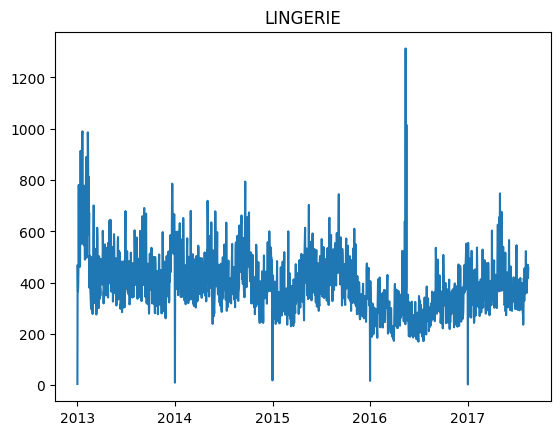

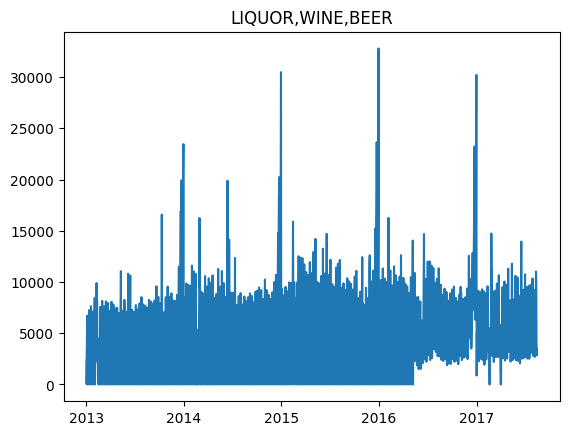

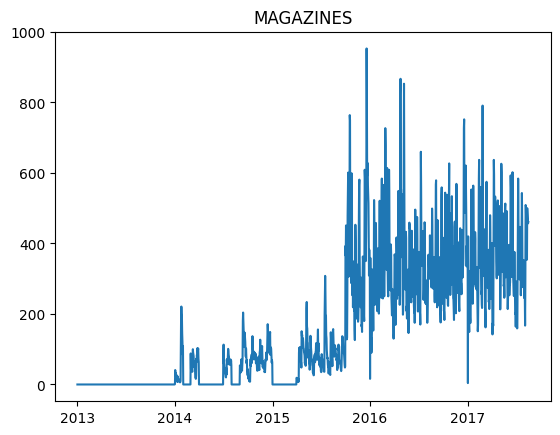

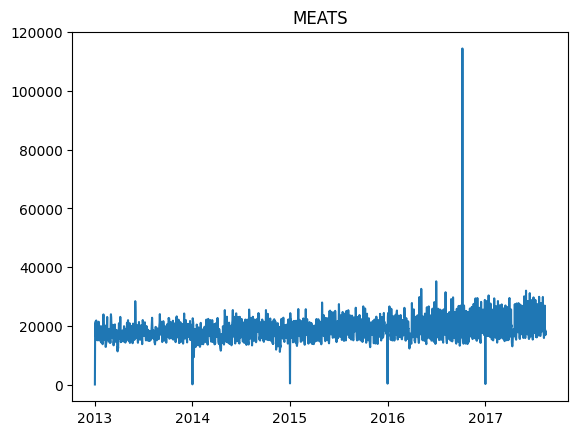

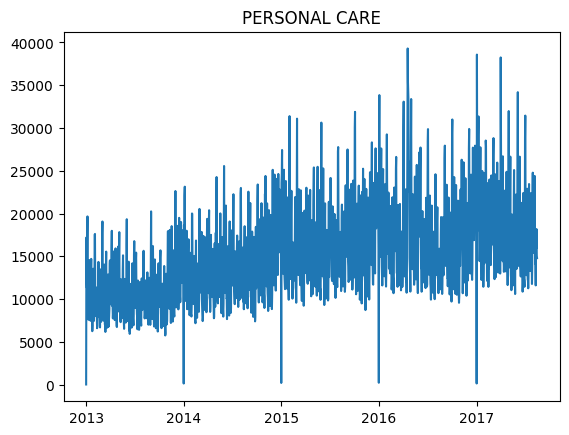

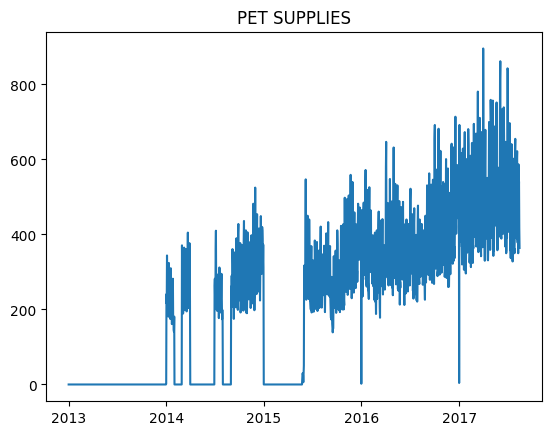

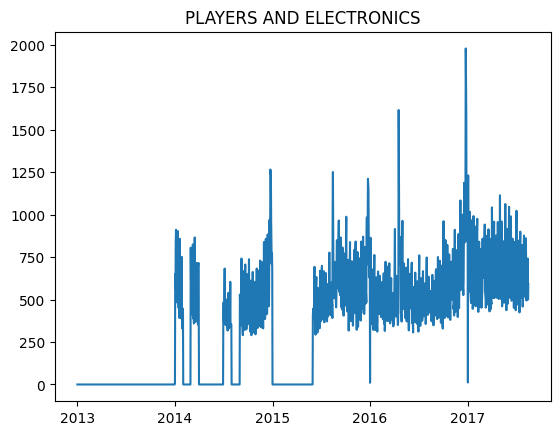

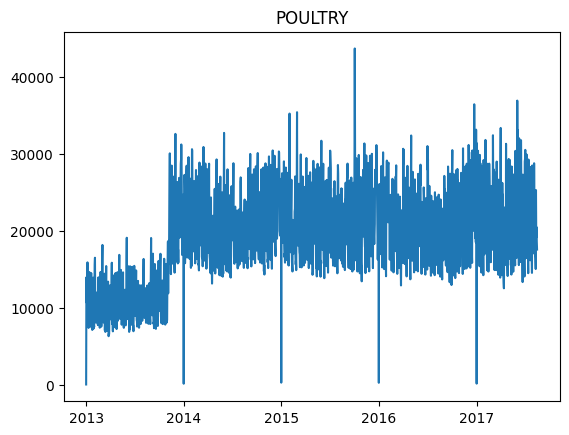

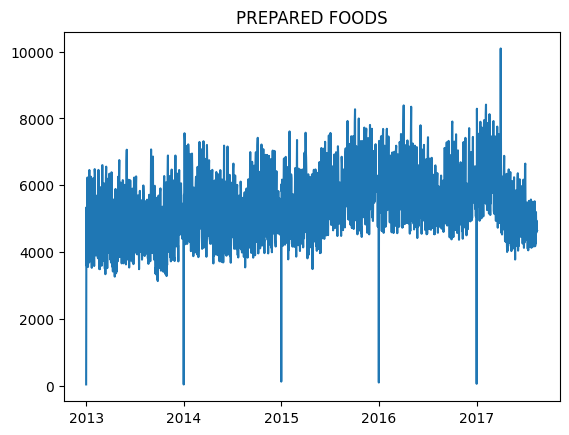

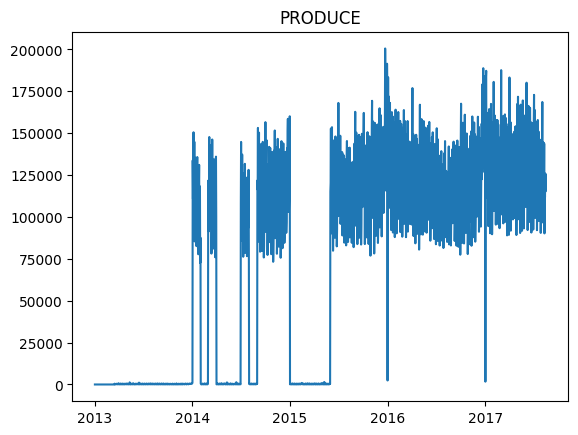

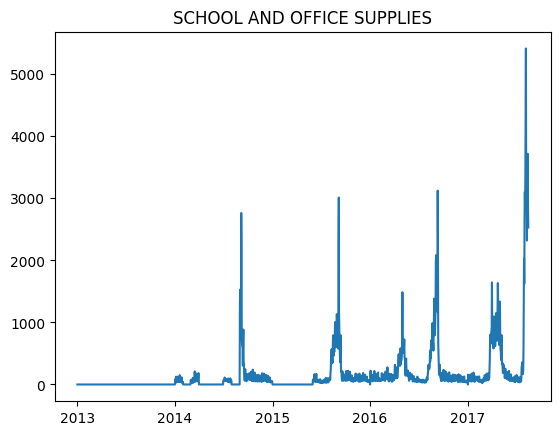

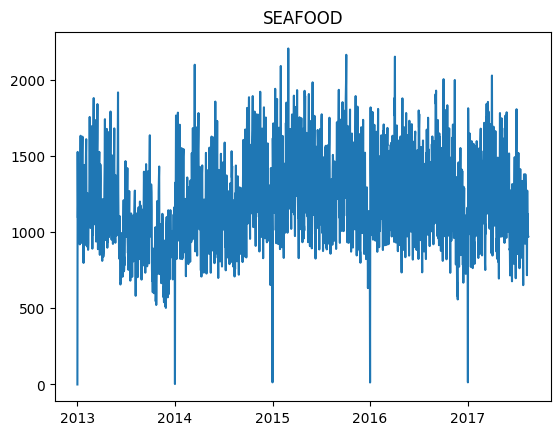

In [ ]:
for column in total_sales_df.columns:
    plt.plot(total_sales_df[column])
    plt.title(column)
    plt.show()

In [ ]:
total_sales_df = total_sales_df[total_sales_df.index>='2015-08-15']

In [ ]:
missing_data(total_sales_df)

In [ ]:
#lets break it down by thirds for low, mid, high
avg_daily_sales = total_sales_df.apply(np.mean, axis=0).sort_values()
low, mid = np.percentile(total_sales_df.apply(np.mean, axis=0).sort_values(),[33,66])

In [ ]:
low_vol_columns = list(avg_daily_sales[avg_daily_sales<=low].index)
mid_vol_columns = avg_daily_sales[(avg_daily_sales>low) & (avg_daily_sales<mid)].index
high_vol_columns = avg_daily_sales[avg_daily_sales>=mid].index

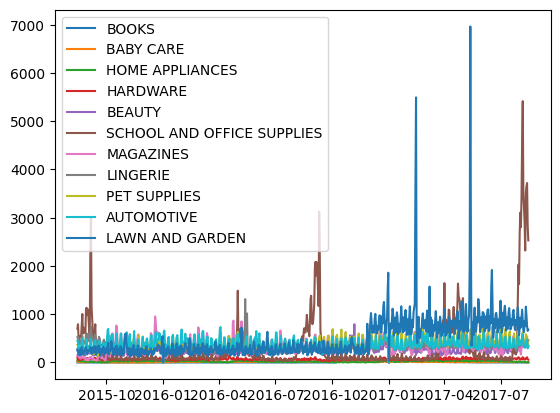

In [ ]:
#total_sales_df[low_vol_columns].plot.line()
plt.plot(total_sales_df[low_vol_columns])
plt.legend(low_vol_columns, loc='best') #, bbox_to_anchor=(1.1, 1.1))
plt.show()

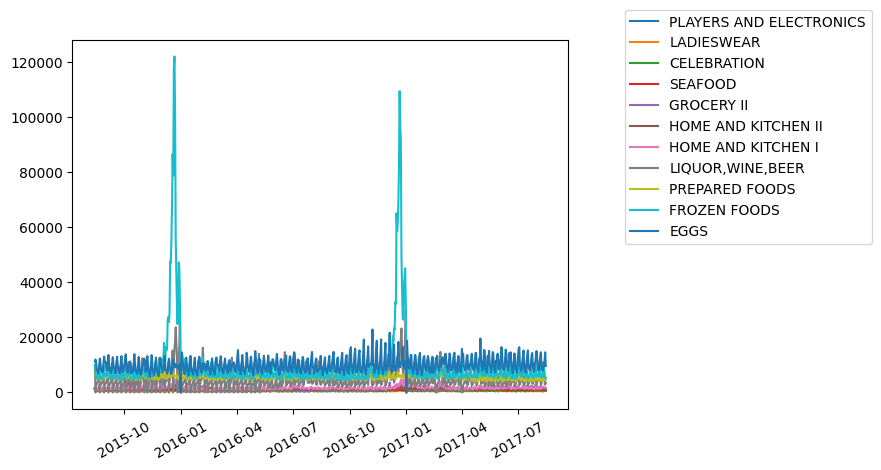

In [ ]:
plt.plot(total_sales_df[mid_vol_columns])
plt.legend(mid_vol_columns, loc='best', bbox_to_anchor=(1.1, 1.1))
plt.xticks(rotation=30)
plt.show()

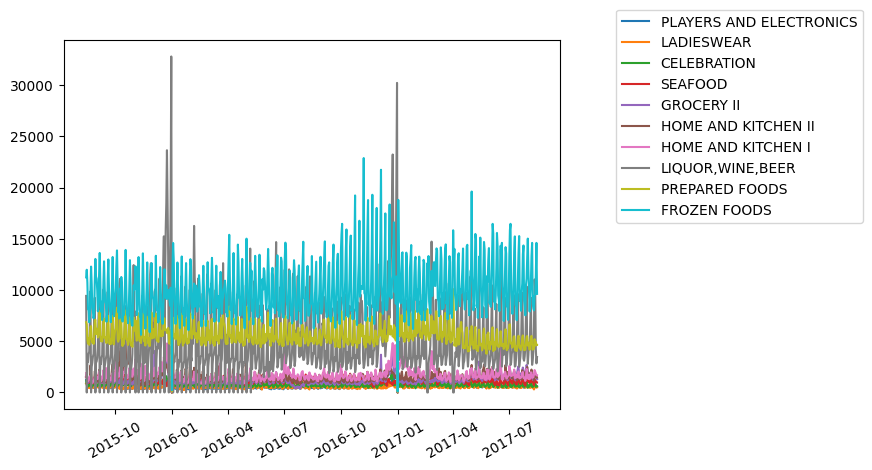

In [ ]:
plt.plot(total_sales_df[mid_vol_columns].drop(columns='FROZEN FOODS'))
plt.legend(mid_vol_columns, loc='best', bbox_to_anchor=(1.1, 1.1))
plt.xticks(rotation=30)
plt.show()

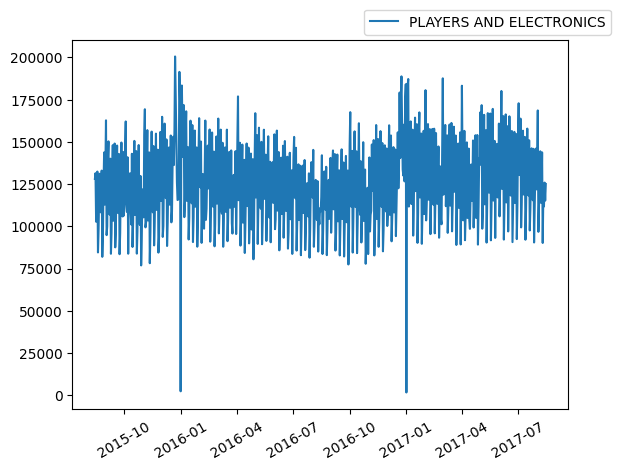

In [ ]:
plt.plot(total_sales_df['PRODUCE'])
plt.legend(mid_vol_columns, loc='best', bbox_to_anchor=(1.1, 1.1))
plt.xticks(rotation=30)
plt.show()

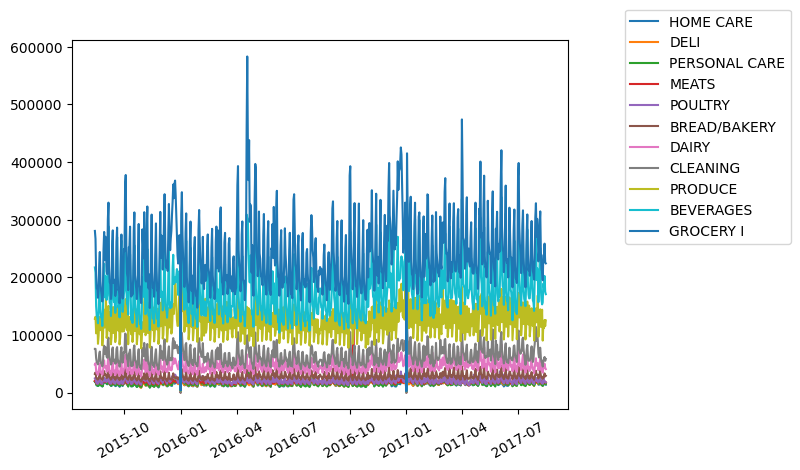

In [ ]:
plt.plot(total_sales_df[high_vol_columns])
plt.legend(high_vol_columns, loc='best', bbox_to_anchor=(1.1, 1.1))
plt.xticks(rotation=30)
plt.show()

In [ ]:
#setting variables
feature = 'PRODUCE'
prediction_days = 30

In [ ]:
df = total_sales_df[[feature]].reset_index()
df.head()

family,date,PRODUCE
0,2015-08-15,128147.18
1,2015-08-16,131493.93
2,2015-08-17,102769.60
3,2015-08-18,106468.23
4,2015-08-19,132449.58


In [ ]:
#adding holiday data

holiday = pd.DataFrame([])

ecuador_holidays = holidays.EC()  # this is a dict
# the below is the same, but takes a string:
ecuador_holidays = holidays.country_holidays('EC')  # this is a dict


for date_, name in sorted(holidays.EC(years=[2015,2016,2017,2018]).items()):
    holiday = pd.concat([holiday, pd.DataFrame({'ds': date_, 'holiday': "EC-Holidays", 'lower_window': -2, 'upper_window': 1}, index=[0])], ignore_index=True)

holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')
holiday.head()

,ds,holiday,lower_window,upper_window
0,2015-01-01,EC-Holidays,-2,1
1,2015-02-16,EC-Holidays,-2,1
2,2015-02-17,EC-Holidays,-2,1
3,2015-04-03,EC-Holidays,-2,1
4,2015-05-01,EC-Holidays,-2,1


In [ ]:

forecast_start_dt = date(2017,7,1) #data set ends of (2017,8,15)
forecast_start_date = (forecast_start_dt).strftime("%Y-%m-%d")
print(forecast_start_date)

2017-07-01


In [ ]:
df_copy = df.copy()
df_copy = df_copy.rename(columns={'date': 'ds', feature: 'y'})
df_copy[['y']] = df_copy[['y']].apply(pd.to_numeric)

df_copy['ds'] = pd.to_datetime(df_copy['ds'])

train_set = df_copy[(df_copy['ds'] < forecast_start_date) ]

m = Prophet()

m.fit(train_set)

future = m.make_future_dataframe(periods=prediction_days)
fcst_prophet_train = m.predict(future)

#adding filter to only add the forecasted data into predicted_df
filter = fcst_prophet_train['ds']>=forecast_start_date
predicted_df = fcst_prophet_train[filter][['ds','yhat']]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgxar86ap/u1lby8ps.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgxar86ap/t5hz95pl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77635', 'data', 'file=/tmp/tmpgxar86ap/u1lby8ps.json', 'init=/tmp/tmpgxar86ap/t5hz95pl.json', 'output', 'file=/tmp/tmpgxar86ap/prophet_modell8jkkotv/prophet_model-20240127191742.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:17:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:17:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
predicted_df.head()

,ds,yhat
684,2017-07-01,144551.55
685,2017-07-02,155275.79
686,2017-07-03,122322.49
687,2017-07-04,127581.74
688,2017-07-05,160193.66


In [ ]:
df_copy = df.copy()
df_copy.columns = ['ds', 'ytrue']
predicted_df = predicted_df.merge(df_copy)

In [ ]:
predicted_df

,ds,yhat,ytrue
0,2017-07-01,144551.55,155487.63
1,2017-07-02,155275.79,172890.14
2,2017-07-03,122322.49,130389.20
3,2017-07-04,127581.74,131534.55
4,2017-07-05,160193.66,163804.33
5,2017-07-06,102606.63,99395.60
6,2017-07-07,115957.70,114346.57
7,2017-07-08,144801.94,139294.77
8,2017-07-09,155526.18,156633.92
9,2017-07-10,122572.87,118856.99


In [ ]:
mape(predicted_df['ytrue'], predicted_df['yhat'])

6.232212641805213

# Cross Validation

In [ ]:
m = Prophet()
m.fit(train_set)
df_cv = cross_validation(m, initial='365 days', period='30 days', horizon = '30 days')

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgxar86ap/7bsn0jye.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgxar86ap/m5idsylr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87196', 'data', 'file=/tmp/tmpgxar86ap/7bsn0jye.json', 'init=/tmp/tmpgxar86ap/m5idsylr.json', 'output', 'file=/tmp/tmpgxar86ap/prophet_model98987xmp/prophet_model-20240127192138.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:21:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:21:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cu

  0%|          | 0/10 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpgxar86ap/kj77ergm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgxar86ap/boqca1_2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7652', 'data', 'file=/tmp/tmpgxar86ap/kj77ergm.json', 'init=/tmp/tmpgxar86ap/boqca1_2.json', 'output', 'file=/tmp/tmpgxar86ap/prophet_modelhcrqj3zd/prophet_model-20240127192138.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:21:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:21:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgxar86ap/fylz7yx3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgxar86ap/wn_a9n4e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

In [ ]:
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,409760751.07,20242.55,13048.48,0.09,0.07,0.10,0.83
1,4 days,268340338.98,16381.10,11099.49,0.08,0.06,0.08,0.80
2,5 days,140946716.48,11872.10,8898.09,0.07,0.06,0.07,0.87
3,6 days,125646472.80,11209.21,9213.13,0.07,0.07,0.07,0.87
4,7 days,95432475.73,9768.95,8406.53,0.07,0.07,0.07,0.93
5,8 days,75869850.32,8710.33,7690.14,0.06,0.07,0.06,0.97
6,9 days,61456214.50,7839.40,6612.24,0.06,0.05,0.05,1.00
7,10 days,49474415.32,7033.81,5433.12,0.05,0.04,0.05,1.00
8,11 days,78803127.28,8877.11,6728.51,0.05,0.04,0.05,0.97
9,12 days,83074092.96,9114.50,6711.97,0.05,0.05,0.05,0.93


In [ ]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,409760751.07,20242.55,13048.48,0.09,0.07,0.10,0.83
1,4 days,268340338.98,16381.10,11099.49,0.08,0.06,0.08,0.80
2,5 days,140946716.48,11872.10,8898.09,0.07,0.06,0.07,0.87
3,6 days,125646472.80,11209.21,9213.13,0.07,0.07,0.07,0.87
4,7 days,95432475.73,9768.95,8406.53,0.07,0.07,0.07,0.93


In [ ]:
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
23,26 days,255321339.99,15978.78,12051.51,0.10,0.08,0.10,0.83
24,27 days,305998718.10,17492.82,13271.14,0.11,0.09,0.11,0.80
25,28 days,503579310.92,22440.57,15736.36,0.13,0.09,0.13,0.77
26,29 days,550773207.50,23468.56,16646.15,0.12,0.09,0.13,0.66
27,30 days,1247655619.21,35322.17,21528.35,3.01,0.12,0.19,0.63


In [ ]:
df_cv['mape'] = (df_cv['y']-df_cv['yhat'])/(df_cv['y'])*100
df_cv['overestimate'] = df_cv['yhat'] > df_cv['y']

df_cv.sort_values('mape',ascending=False).head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,mape,overestimate
110,2016-12-23,98378.94,81616.38,113066.19,176327.97,2016-12-02,44.21,False
116,2016-12-30,98423.75,83111.32,113328.85,175022.19,2016-12-02,43.76,False
109,2016-12-22,87908.58,73744.56,103017.67,140444.94,2016-12-02,37.41,False
119,2017-01-02,117234.40,98087.46,137349.38,184113.03,2017-01-01,36.32,False
120,2017-01-03,121496.34,102699.93,139814.31,183306.23,2017-01-01,33.72,False
111,2016-12-24,127783.29,111873.19,143817.35,188809.16,2016-12-02,32.32,False
117,2016-12-31,127828.10,112758.63,143785.06,184154.67,2016-12-02,30.59,False
115,2016-12-29,87953.39,71005.70,102743.29,126652.84,2016-12-02,30.56,False
238,2017-05-01,126144.56,105356.39,144077.50,167558.58,2017-04-01,24.72,False
108,2016-12-21,143692.24,128291.16,160796.66,179251.71,2016-12-02,19.84,False


In [ ]:
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(train_set)  # Fit model with given params
    df_cv = cross_validation(m, initial='365 days', period='30 days', horizon = '30 days', parallel='processes')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgxar86ap/snpyfxlf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgxar86ap/lb6ye70b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18754', 'data', 'file=/tmp/tmpgxar86ap/snpyfxlf.json', 'init=/tmp/tmpgxar86ap/lb6ye70b.json', 'output', 'file=/tmp/tmpgxar86ap/prophet_modelomsp9lo2/prophet_model-20240127192636.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:26:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:26:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 10 forecasts with cu

In [ ]:
print(tuning_results)

    changepoint_prior_scale  seasonality_prior_scale     rmse
0                      0.00                     0.01 18782.74
1                      0.00                     0.10 18893.21
2                      0.00                     1.00 18561.88
3                      0.00                    10.00 18653.47
4                      0.01                     0.01 18217.35
5                      0.01                     0.10 17783.71
6                      0.01                     1.00 17769.71
7                      0.01                    10.00 17707.99
8                      0.10                     0.01 18075.77
9                      0.10                     0.10 17730.75
10                     0.10                     1.00 17712.69
11                     0.10                    10.00 17700.07
12                     0.50                     0.01 18060.05
13                     0.50                     0.10 17756.85
14                     0.50                     1.00 17754.68
15      

In [ ]:
tuning_results.sort_values('rmse')

,changepoint_prior_scale,seasonality_prior_scale,rmse
11,0.10,10.00,17700.07
7,0.01,10.00,17707.99
10,0.10,1.00,17712.69
9,0.10,0.10,17730.75
14,0.50,1.00,17754.68
13,0.50,0.10,17756.85
6,0.01,1.00,17769.71
15,0.50,10.00,17782.35
5,0.01,0.10,17783.71
12,0.50,0.01,18060.05


In [ ]:
tuning_results.sort_values('rmse').reset_index(drop=True).iloc[0]

changepoint_prior_scale       0.10
seasonality_prior_scale      10.00
rmse                      17700.07
Name: 0, dtype: float64

In [ ]:
dict(tuning_results.sort_values('rmse').reset_index(drop=True).iloc[0])

{'changepoint_prior_scale': 0.1,
 'seasonality_prior_scale': 10.0,
 'rmse': 17700.071817885597}

In [ ]:
params_dictionary = dict(tuning_results.sort_values('rmse').reset_index(drop=True).drop('rmse',axis='columns').iloc[0])

m = Prophet(changepoint_prior_scale = params_dictionary['changepoint_prior_scale'],
            seasonality_prior_scale = params_dictionary['seasonality_prior_scale'])

In [ ]:
m.fit(train_set)

future = m.make_future_dataframe(periods=prediction_days)
fcst_prophet_train = m.predict(future)

#adding filter to only add the forecasted data into predicted_df
filter = fcst_prophet_train['ds']>=forecast_start_date
predicted_df = fcst_prophet_train[filter][['ds','yhat']]

df_copy = df.copy()
df_copy.columns = ['ds', 'ytrue']
predicted_df = predicted_df.merge(df_copy)
mape(predicted_df['ytrue'], predicted_df['yhat'])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgxar86ap/uvbsxte7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgxar86ap/j1phbtlm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64873', 'data', 'file=/tmp/tmpgxar86ap/uvbsxte7.json', 'init=/tmp/tmpgxar86ap/j1phbtlm.json', 'output', 'file=/tmp/tmpgxar86ap/prophet_modeluluf_31z/prophet_model-20240127193131.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:31:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:31:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


4.789708629824525

# New Section
